# Unveiling Insights with Bellabeat: Exploratory Data Analysis

## Empowering Women's Wellness Through Data Analysis

Welcome to this data analysis project with Bellabeat, a forward-thinking manufacturer of health-focused products designed exclusively for women. In this captivating case study, we embark on a journey to explore and gain profound insights from the world of smart devices. Bellabeat is dedicated to enhancing women's well-being, and this analysis cloud play a role in shaping their future marketing and customer retention strategies.

### Data Source

The dataset used in this analysis, titled "FitBit Fitness Tracker Data: Pattern Recognition with Tracker Data - Improve Your Overall Health," was provided by Möbius on Kaggle. It is licensed under CC0: Public Domain, allowing unrestricted use, modification, and distribution without attribution requirements.

Generated through a distributed survey via Amazon Mechanical Turk, the dataset includes minute-level outputs of physical activity, heart rate, and sleep monitoring over the course of 31 days. It encompasses data from thirty eligible users, covering features such as TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, and Calories.

The dataset showcases variations resulting from different fitness trackers and individual tracking behaviors/preferences. It can be parsed by export session ID or timestamp. With its extensive coverage of minute-level data, the dataset offers insights into fitness activities and patterns.

By leveraging the dataset's CC0 licensing, a comprehensive analysis was conducted to improve overall health. The dataset provides valuable information for studying fitness and lifestyle patterns.

Please acknowledge Möbius as the dataset provider and reference the original dataset appropriately.

---
---

Import modules

In [5]:
import numpy as np
import pandas as pd
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [6]:
# Load datasets with updated paths
activity = pd.read_csv("../data/dailyActivity_merged.csv")
calories = pd.read_csv("../data/hourlyCalories_merged.csv")
intensities = pd.read_csv("../data/hourlyIntensities_merged.csv")
sleep = pd.read_csv("../data/sleepDay_merged.csv")
weight = pd.read_csv("../data/weightLogInfo_merged.csv")

Properly format the time based columns

In [7]:
# intensities
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
intensities['time'] = intensities['ActivityHour'].dt.strftime("%H:%M:%S")
intensities['date'] = intensities['ActivityHour'].dt.strftime("%m/%d/%y")

# calories
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
calories['time'] = calories['ActivityHour'].dt.strftime("%H:%M:%S")
calories['date'] = calories['ActivityHour'].dt.strftime("%m/%d/%y")

# activity
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format="%m/%d/%Y")
activity['date'] = activity['ActivityDate'].dt.strftime("%m/%d/%y")

# sleep
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")
sleep['date'] = sleep['SleepDay'].dt.strftime("%m/%d/%y")

Figure out the number of unique IDs in the individual datasets

In [8]:
unique_ids_activity = activity['Id'].nunique()
unique_ids_calories = calories['Id'].nunique()
unique_ids_intensities = intensities['Id'].nunique()
unique_ids_sleep = sleep['Id'].nunique()
unique_ids_weight = weight['Id'].nunique()

print("Number of unique IDs in activity:", unique_ids_activity)
print("Number of unique IDs in calories:", unique_ids_calories)
print("Number of unique IDs in intensities:", unique_ids_intensities)
print("Number of unique IDs in sleep:", unique_ids_sleep)
print("Number of unique IDs in weight:", unique_ids_weight)

Number of unique IDs in activity: 33
Number of unique IDs in calories: 33
Number of unique IDs in intensities: 33
Number of unique IDs in sleep: 24
Number of unique IDs in weight: 8


33 participants appear in the dataset but only 24 submitted their sleep data or chose to wear the device at night and only 8 submitted their weight data.

In [10]:
# Generate summary statistics
activity_summary = activity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()
active_minutes_summary = activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()
calories_summary = calories[['Calories']].describe()
sleep_summary = sleep[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()
weight_summary = weight[['WeightKg', 'BMI']].describe()

# Print summary statistics with tabulate for better readability
print("Summary Statistics for Activity:")
print(tabulate(activity_summary, headers='keys', tablefmt='pretty'))

print("\nSummary Statistics for Active Minutes:")
print(tabulate(active_minutes_summary, headers='keys', tablefmt='pretty'))

print("\nSummary Statistics for Calories:")
print(tabulate(calories_summary, headers='keys', tablefmt='pretty'))

print("\nSummary Statistics for Sleep:")
print(tabulate(sleep_summary, headers='keys', tablefmt='pretty'))

print("\nSummary Statistics for Weight:")
print(tabulate(weight_summary, headers='keys', tablefmt='pretty'))

Summary Statistics for Activity:
+-------+--------------------+-------------------+-------------------+-------------------+
|       |     TotalSteps     |   TotalDistance   | SedentaryMinutes  |     Calories      |
+-------+--------------------+-------------------+-------------------+-------------------+
| count |       940.0        |       940.0       |       940.0       |       940.0       |
| mean  | 7637.9106382978725 | 5.489702121915415 | 991.2106382978724 | 2303.609574468085 |
|  std  | 5087.150741753409  | 3.924605908624871 | 301.2674367904795 | 718.1668621342561 |
|  min  |        0.0         |        0.0        |        0.0        |        0.0        |
|  25%  |      3789.75       | 2.61999988555908  |      729.75       |      1828.5       |
|  50%  |       7405.5       | 5.24499988555908  |      1057.5       |      2134.0       |
|  75%  |      10727.0       | 7.71249997615814  |      1229.5       |      2793.25      |
|  max  |      36019.0       | 28.0300006866455  |      1

### Insights:

#### Sleep Patterns:
- **Average Sleep**: Participants typically sleep once a day, averaging around 7 hours of sleep per night. This falls within the recommended 7-9 hours for adults to maintain optimal health.
- **Variation**: Although 7 hours is common, individual sleep needs can vary based on age, lifestyle, and health. For instance, older adults might need slightly less sleep, while younger adults may require more.
- **Health Impact**: Adequate sleep is crucial for cognitive function, mood regulation, and overall physical health. Chronic sleep deprivation can lead to a host of health issues, including impaired immunity, increased risk of chronic conditions (like hypertension and diabetes), and mental health disorders.

#### Physical Activity:
- **Step Count**: The average daily step count is 7,638, which is slightly below the 8,000 steps per day recommended for significant health benefits. The CDC reports that taking 8,000 steps daily is associated with a 51% lower risk of all-cause mortality, underscoring the importance of regular physical activity.
- **Intensity of Activity**: The mean VeryActiveMinutes is 21 minutes, indicating that while some users engage in vigorous physical activity, there is room to encourage more high-intensity workouts.
- **Health Benefits**: Regular physical activity helps in maintaining a healthy weight, reducing the risk of heart disease, improving mental health, and enhancing overall well-being.

#### Sedentary Lifestyle:
- **Concern**: The data shows that participants are sedentary for about 991 minutes (approximately 16.5 hours) per day on average. This reflects a common pattern in many industrialized countries where sedentary lifestyles are prevalent, posing significant public health risks like obesity, cardiovascular diseases, and metabolic syndrome.
- **Action**: Promoting increased physical activity is essential. Strategies can include encouraging users to take regular breaks from sitting, incorporating more walking into their daily routines, and participating in structured exercise programs.

### Additional Insights from Summary Statistics:
- **Caloric Intake and Burn**: The average daily calorie burn is 2,304 calories. Understanding the balance between caloric intake and expenditure can help users manage their weight more effectively.
- **Weight and BMI**: The average weight is 72 kg, with a mean BMI of 25.18, indicating that many participants are at the borderline of overweight. Focusing on healthy weight management practices can be beneficial.

### Research-Based Health Facts:
1. **Exercise and Mental Health**: Regular physical activity can reduce symptoms of depression and anxiety, improve mood, and enhance overall mental health. This can be a key message in promoting BellaBeat's fitness tracking features.
2. **Sleep and Productivity**: Adequate sleep is linked to improved concentration, productivity, and overall performance. Highlighting the importance of sleep tracking can help users see the value in monitoring and improving their sleep patterns.
3. **Sedentary Behavior**: Reducing sedentary time and increasing physical activity can significantly lower the risk of chronic diseases such as Type 2 diabetes, cardiovascular diseases, and certain cancers.

### Marketing and Customer Retention Strategies for BellaBeat:
1. **Personalized Health Insights**: Use the data to provide personalized recommendations to users, such as tips for increasing daily steps, improving sleep quality, and reducing sedentary time. Personalized insights can increase user engagement and satisfaction.
2. **Challenges and Rewards**: Implement challenges that encourage users to achieve daily step goals or improve their sleep patterns. Offering rewards for meeting these challenges can boost motivation and retention.
3. **Educational Content**: Provide users with educational content about the importance of physical activity, sleep, and overall wellness. This can be in the form of blog posts, in-app notifications, or webinars.
4. **Community Building**: Foster a sense of community by creating forums or social features where users can share their progress, challenges, and successes. A supportive community can enhance user loyalty and retention.
5. **Integrating with Other Health Services**: Partner with nutritionists, personal trainers, and healthcare providers to offer integrated health services. This can provide a more comprehensive health solution for users.

By leveraging these insights and strategies, BellaBeat can enhance its product offerings, improve user engagement, and promote long-term customer retention.

---

In [11]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,04/12/16
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,04/13/16
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,04/14/16
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,04/15/16
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,04/16/16


In [12]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

### Data Dictionary of activity

| Column Name                | Description                                              |
| -------------------------- | -------------------------------------------------------- |
| Id                         | Unique identifier for each record in the dataframe       |
| ActivityDate               | Date of the activity or measurement                       |
| TotalSteps                 | Total number of steps taken                              |
| TotalDistance              | Total distance covered                                   |
| TrackerDistance            | Distance measured by a tracking device                   |
| LoggedActivitiesDistance   | Distance covered during logged activities                |
| VeryActiveDistance         | Distance covered during very active activities           |
| ModeratelyActiveDistance   | Distance covered during moderately active activities     |
| LightActiveDistance        | Distance covered during light active activities          |
| SedentaryActiveDistance    | Distance covered during sedentary active activities      |
| VeryActiveMinutes          | Total minutes spent in very active activities            |
| FairlyActiveMinutes        | Total minutes spent in fairly active activities          |
| LightlyActiveMinutes       | Total minutes spent in lightly active activities         |
| SedentaryMinutes           | Total minutes spent in a sedentary state                 |
| Calories                   | Total number of calories burned                          |

<br>

---

In [20]:
calories.head()

,Id,ActivityHour,Calories,time,date
0,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16
1,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16
2,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16
3,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16
4,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16


In [13]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
 3   time          22099 non-null  object        
 4   date          22099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 863.4+ KB


### Data Dictionary of calories

| Column Name   | Description                                          |
| ------------- | ---------------------------------------------------- |
| Id            | Unique identifier for each record in the dataframe   |
| ActivityHour  | Date and time of the activity                        |
| Calories      | Total number of calories burned                      |
| time          | Time associated with the activity                    |
| date          | Date associated with the activity                    |

<br>

---

In [21]:
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16


In [22]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
 4   time              22099 non-null  object        
 5   date              22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.0+ MB


### Data Dictionary of intensities

| Column Name        | Description                                              |
| ------------------ | -------------------------------------------------------- |
| Id                 | Unique identifier for each record in the dataframe       |
| ActivityHour       | Date and time of the activity                            |
| TotalIntensity     | Total intensity of the activity                          |
| AverageIntensity   | Average intensity of the activity                        |
| time               | Time associated with the activity                        |
| date               | Date associated with the activity                        |

<br>

---


In [23]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
0,1503960366,2016-04-12,1,327,346,04/12/16
1,1503960366,2016-04-13,2,384,407,04/13/16
2,1503960366,2016-04-15,1,412,442,04/15/16
3,1503960366,2016-04-16,2,340,367,04/16/16
4,1503960366,2016-04-17,1,700,712,04/17/16


In [24]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   date                413 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


### Data Dictionary of sleep

| Column Name           | Description                                              |
| --------------------- | -------------------------------------------------------- |
| Id                    | Unique identifier for each record in the dataframe       |
| SleepDay              | Date and time of the sleep record                        |
| TotalSleepRecords     | Total number of sleep records                            |
| TotalMinutesAsleep    | Total minutes asleep                                     |
| TotalTimeInBed        | Total time spent in bed                                  |
| date                  | Date associated with the sleep record                    |

<br>

---

In [25]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [26]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


### Data Dictionary of weight

| Column Name          | Description                                          |
| -------------------- | ---------------------------------------------------- |
| Id                   | Unique identifier for each record in the dataframe   |
| Date                 | Date of the weight measurement                       |
| WeightKg             | Weight in kilograms                                  |
| WeightPounds         | Weight in pounds                                     |
| Fat                  | Body fat percentage                                  |
| BMI                  | Body Mass Index                                      |
| IsManualReport       | Whether the weight was manually reported (boolean)   |
| LogId                | Unique log identifier                                |

<br>

---

We will analyze the user's intensity over time and overlay it with the calories burned over time. This analysis will be performed in this general EDA notebook. Given that the intensity and calories datasets are relatively small, this allows for a more comprehensive analysis without the need for separate notebooks for each dataset.

c:\Users\jer93\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jer93\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


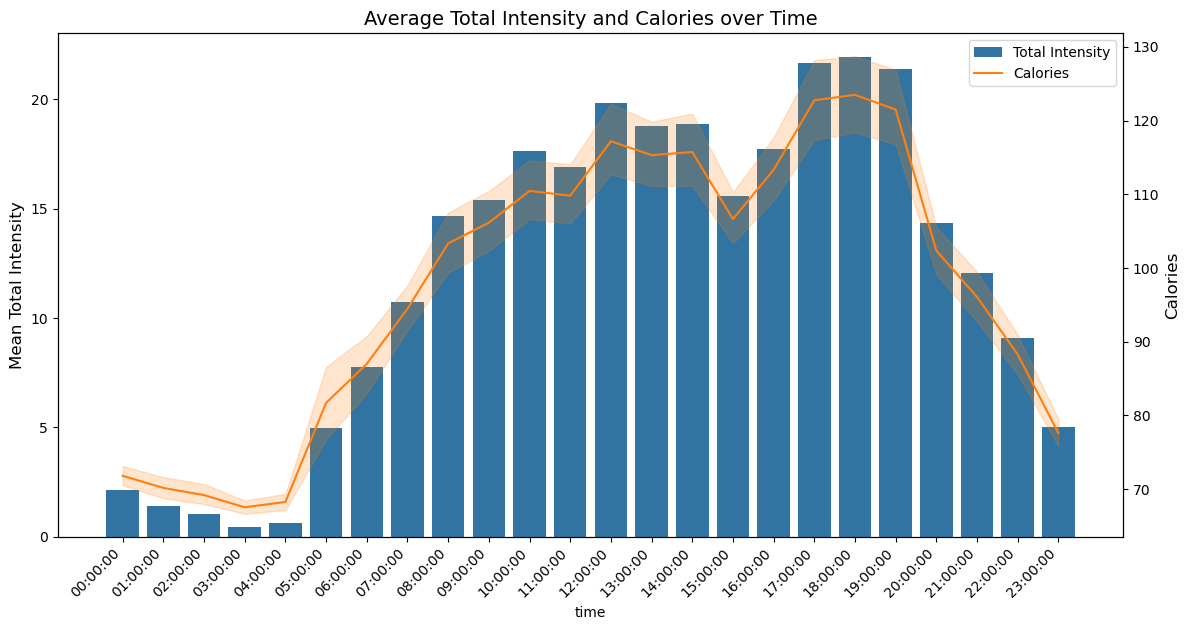

In [14]:
# Define the custom colors
custom_blue = "#1f77b4"  # A shade of blue
custom_orange = "#ff7f0e"  # A shade of orange

# Group by 'time' and calculate the mean of 'TotalIntensity'
int_new = intensities.groupby('time').mean(numeric_only=True).reset_index()

# Merge the 'Calories' DataFrame into 'int_new' based on 'time' and 'Id'
merged_df = pd.merge(int_new, calories[['time', 'Calories']], on='time', how='inner')

# Create the bar plot for 'TotalIntensity' in blue
plt.figure(figsize=(12, 6))  # Increase the figure size
ax1 = sns.barplot(x='time', y='TotalIntensity', data=merged_df, color=custom_blue, label='Total Intensity')

# Set the first y-axis label
ax1.set_ylabel('Mean Total Intensity', fontsize=12)

# Create a secondary y-axis for 'Calories'
ax2 = ax1.twinx()
sns.lineplot(x='time', y='Calories', data=calories, color=custom_orange, label='Calories')

# Set the second y-axis label
ax2.set_ylabel('Calories', fontsize=12)

plt.xlabel('Time', fontsize=12)
plt.title('Average Total Intensity and Calories over Time', fontsize=14)

# Use plt.setp to rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=10)

# Use plt.setp to modify the properties of x-axis tick labels
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.show()

Most activity happens between 5 am and 11 pm, with peaks around 5 pm and 7 pm. This probably indicates, that people got off work and go to the gym or other activities. We can also nicely see how intensities and calories correlate which each other.

**Sending notifications to promote physical activity during this time might be an effective approach to motivate people to be more active.**

---

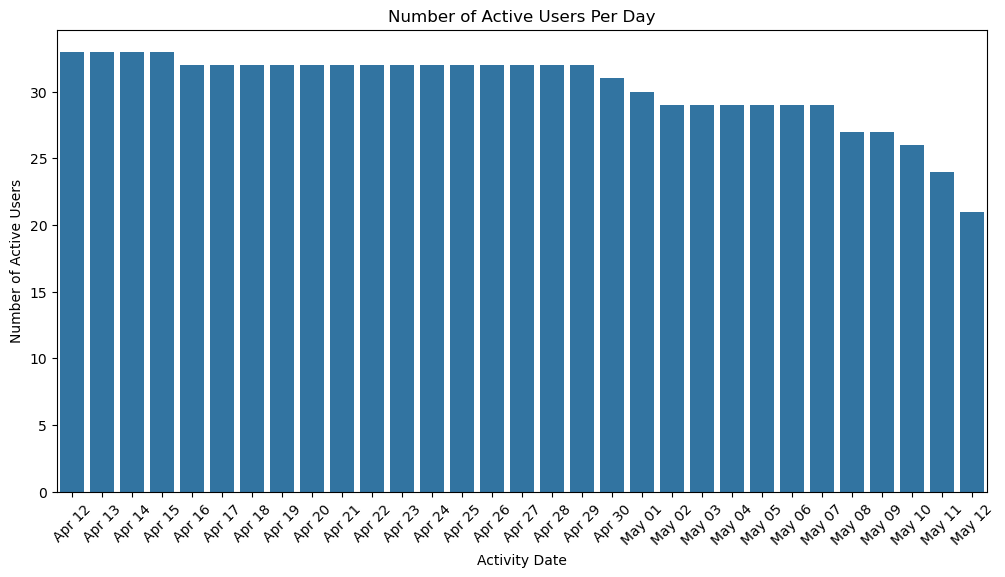

In [15]:
# Group the data by date and count the number of unique users each day
user_activity_by_date = activity.groupby('ActivityDate')['Id'].nunique().reset_index()

# Format the date in the 'ActivityDate' column to remove the year
user_activity_by_date['ActivityDate'] = user_activity_by_date['ActivityDate'].dt.strftime('%b %d')

# Create the second bar plot with the same blue color
plt.figure(figsize=(12, 6))
sns.barplot(data=user_activity_by_date, x='ActivityDate', y='Id', color=custom_blue)
plt.xlabel('Activity Date')
plt.ylabel('Number of Active Users')
plt.title('Number of Active Users Per Day')
plt.xticks(rotation=45)
plt.show()

As can be seen, at the beginning of data collection, all 33 users used the app on a daily basis. However, this usage steadily decreased over time.

**Motivating users to use the devices and app each day using streaks and ranking systems could enhance engagement levels.**